# Aim: To Perform Association Rule Mining in python

In [ ]:
import pandas as pd
df = pd.read_csv('/content/transactions_dataset.csv')
df.head()

,Transaction_ID,Milk,Bread,Butter,Cheese,Eggs,Coffee,Tea,Sugar,Rice,Cereal
0,1,0,1,1,1,0,0,0,1,1,1
1,2,0,1,1,0,0,0,0,1,1,0
2,3,1,0,0,0,1,1,0,1,1,0
3,4,1,0,0,1,1,1,0,0,1,1
4,5,0,1,0,1,0,1,0,1,1,0


In [ ]:
# Drop Transaction_ID column
df = df.drop(columns=["Transaction_ID"])

In [ ]:
# Convert 0s and 1s to Boolean values (True/False)
df = df.astype(bool)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
# Perform Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [ ]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                         itemsets
0       0.54                           (Milk)
1       0.68                          (Bread)
2       0.56                         (Butter)
3       0.60                         (Cheese)
4       0.52                           (Eggs)
..       ...                              ...
109     0.22            (Coffee, Rice, Sugar)
110     0.20           (Cereal, Rice, Coffee)
111     0.22  (Cheese, Bread, Butter, Coffee)
112     0.22    (Coffee, Rice, Bread, Butter)
113     0.20    (Cheese, Rice, Bread, Coffee)

[114 rows x 2 columns]


1. Analyze Frequent Itemsets
    Look at the Frequent Itemsets table:

    **Support** represents how often an itemset appears in transactions.

    Higher support values indicate frequently purchased items or item combinations.

    Example:

    1. Milk (54%) → Appears in 54% of transactions.

    2. Bread (68%) → Appears in 68% of transactions.

    3. (Rice, Coffee, Sugar) (22%) → These three items are purchased together 22% of the time.

**Next Steps:**

Identify the most common items and item combinations.

Businesses can use this data for inventory planning or promotional bundling.

In [ ]:
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
                antecedents      consequents  support  confidence      lift
0                    (Milk)          (Bread)     0.34    0.629630  0.925926
1                    (Eggs)           (Milk)     0.32    0.615385  1.139601
2                    (Milk)         (Coffee)     0.34    0.629630  0.983796
3                     (Tea)           (Milk)     0.36    0.600000  1.111111
4                    (Milk)            (Tea)     0.36    0.666667  1.111111
..                      ...              ...      ...         ...       ...
163   (Rice, Bread, Butter)         (Coffee)     0.22    0.733333  1.145833
164   (Cheese, Rice, Bread)         (Coffee)     0.20    0.833333  1.302083
165  (Cheese, Rice, Coffee)          (Bread)     0.20    0.769231  1.131222
166   (Coffee, Rice, Bread)         (Cheese)     0.20    0.714286  1.190476
167          (Cheese, Rice)  (Coffee, Bread)     0.20    0.625000  1.358696

[168 rows x 5 columns]


2. Analyze Association Rules
    Look at the Association Rules table:

    **Confidence** = How often Y is purchased when X is bought.

    **Lift** = Measures how much more likely Y is bought when X is bought (compared to random chance).

    Example Rules:
    1. Milk → Bread (Support = 0.34, Confidence = 62.9%, Lift = 0.92)

        When people buy Milk, they buy Bread 62.9% of the time.

        Lift is < 1, meaning this is not a strong association.

    2. Milk → Tea (Support = 0.36, Confidence = 66.6%, Lift = 1.11)

        66.6% of transactions that contain Milk also contain Tea.

        Lift > 1, meaning there is a positive correlation.

    3. (Bread, Coffee, Butter) → Rice (Support = 0.22, Confidence = 73.3%, Lift = 1.22)

        If a customer buys Bread, Coffee, and Butter, there’s a 73.3% chance they will also buy Rice.

        Lift > 1, so this is a useful rule for recommendations.

Next Steps:

    Identify high-confidence rules (Confidence > 60%).

    Focus on rules with high Lift (Lift > 1), since they show strong dependencies.

    If you are doing this for research, highlight the most interesting patterns.



 3. Visualize the Association Rules

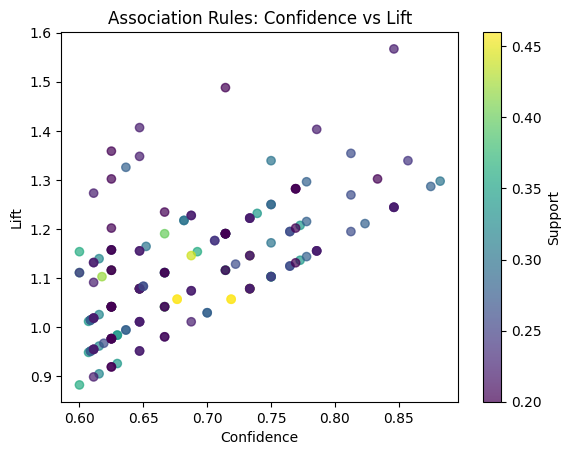

In [ ]:
import matplotlib.pyplot as plt

# Plot Confidence vs Lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, c=rules['support'], cmap='viridis')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs Lift')
plt.colorbar(label='Support')
plt.show()


In [ ]:
# Show top 10 rules with highest lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


               antecedents      consequents  support  confidence      lift
57           (Cereal, Tea)           (Milk)     0.22    0.846154  1.566952
64            (Rice, Milk)         (Cereal)     0.20    0.714286  1.488095
159       (Cheese, Butter)  (Coffee, Bread)     0.22    0.647059  1.406650
160  (Coffee, Rice, Bread)         (Butter)     0.22    0.785714  1.403061
167         (Cheese, Rice)  (Coffee, Bread)     0.20    0.625000  1.358696
131         (Coffee, Eggs)         (Cheese)     0.26    0.812500  1.354167
49           (Bread, Milk)         (Cereal)     0.22    0.647059  1.348039
50          (Cheese, Milk)         (Coffee)     0.24    0.857143  1.339286
121         (Coffee, Rice)         (Butter)     0.30    0.750000  1.339286
115          (Rice, Bread)         (Cereal)     0.28    0.636364  1.325758


In [ ]:
# Focus on high-confidence, high-lift rules
strong_rules = rules[(rules['confidence'] > 0.7) & (rules['lift'] > 1.2)]
print(strong_rules[['antecedents', 'consequents', 'confidence', 'lift']])


                  antecedents consequents  confidence      lift
50             (Cheese, Milk)    (Coffee)    0.857143  1.339286
57              (Cereal, Tea)      (Milk)    0.846154  1.566952
58             (Cereal, Milk)       (Tea)    0.733333  1.222222
64               (Rice, Milk)    (Cereal)    0.714286  1.488095
66           (Cheese, Butter)     (Bread)    0.882353  1.297578
69             (Butter, Eggs)     (Bread)    0.846154  1.244344
79           (Cereal, Butter)     (Bread)    0.846154  1.244344
81              (Bread, Eggs)    (Cheese)    0.750000  1.250000
82            (Cheese, Bread)    (Coffee)    0.772727  1.207386
84            (Coffee, Bread)    (Cheese)    0.739130  1.231884
104              (Tea, Bread)     (Sugar)    0.777778  1.215278
109             (Rice, Sugar)     (Bread)    0.823529  1.211073
113            (Cereal, Rice)     (Bread)    0.875000  1.286765
114           (Cereal, Bread)      (Rice)    0.777778  1.296296
116            (Butter, Eggs)    (Cheese

**CONCLUSION:**

Association Rule Mining Conclusions
1. High Lift Indicates Strong Relationships:

    The rule (Cereal, Tea) → Milk has the highest lift (1.56), meaning customers who buy cereal and tea are significantly more likely to also buy milk than by chance.

2. Rice is a Strong Anchor Item:

    Rice appears frequently in strong rules (e.g., with milk, coffee, cheese), showing it’s strongly associated with multiple items, especially in combo purchases.

3. Cross-Category Associations:

    Items like Cheese & Butter are often purchased together with Coffee & Bread, indicating popular breakfast combos.

4. Milk, Coffee, and Cereal are Key Influencers:

    These items are frequent in both antecedents and consequents, making them strategic for promotions or bundling.

5. Confidence + Lift = High Potential Rules:

    Rules with both high confidence (e.g., >0.7) and high lift (>1.3) are ideal for recommendation systems or store layout planning.